In [94]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = scipy.io.loadmat("hw4_data.mat")
#print(data)
Xtr = data["X"]
ytr = data["y"]
Xtest = data["Xtest"]
ytest = data["ytest"]
Xval = data["Xval"]
yval = data["yval"]

## Problem 1: Linear Regression

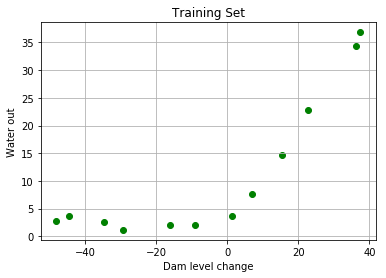

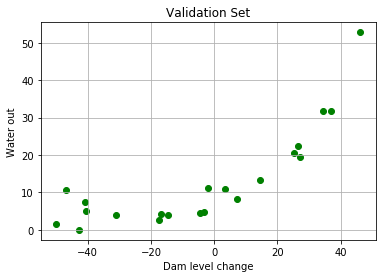

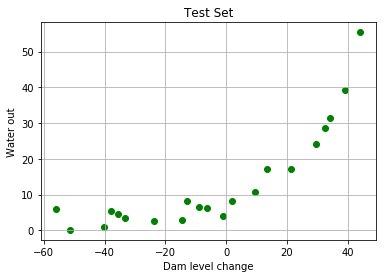

In [95]:
#problem 1.1
def plotScatter(x,y,title,x_title,y_title):
    plt.scatter(x, y, c="green", marker="o")
    #plt.xlim(x.min()-5,x.max()+5)
    #plt.ylim(y.min()-5,y.max()+5)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.grid()
    plt.show()
#plot three scatter-plot figures for the training, validation, and test sets
plotScatter(Xtr, ytr, "Training Set" ,"Dam level change", "Water out")
plotScatter(Xval, yval, "Validation Set" ,"Dam level change", "Water out")
plotScatter(Xtest, ytest, "Test Set" ,"Dam level change", "Water out")

In [96]:
Xtr =np.insert(Xtr,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
thetaStart = np.zeros(Xtr.shape[1], dtype=np.float)

In [97]:
# function to compute h(x)
def h(X, theta):
    theta_t = theta[:,np.newaxis]
    return np.dot( X , theta_t)

In [98]:
#problem 1.2
def computeCost(theta, X, y, lamda):
    insides = (np.power(h(X, theta)-y,2)) 
    insides2 = lamda*np.power(theta[1:],2)
    return (np.sum(insides) + np.sum(insides2))/(2*len(X))

In [99]:
#problem 1.3
def computeGradient(theta, X, y, lamda):
    m = len(X)
    theta_list = []
    for j in range(theta.shape[0]):
        if j == 0:
            x_temp = X[:,j]
            x_temp2 = x_temp[:,np.newaxis]
            theta_temp = (1/m) * np.sum(np.multiply(h(X,theta)-y, x_temp2))
            theta_list.append(theta_temp)
            theta_temp = 0
            del x_temp
            del x_temp2
        else:
            x_temp = X[:,j]
            x_temp2 = x_temp[:,np.newaxis]
            theta_temp = ((1/m) * np.sum(np.multiply(h(X,theta)-y, x_temp2)) + (lamda / m * theta[j]))
            theta_list.append(theta_temp)
            theta_temp = 0
            del x_temp
            del x_temp2
    theta_list = np.array(theta_list)
    return theta_list

In [100]:
# Compute the cost with thetaStart = (0,0)
thetaStart = np.zeros(Xtr.shape[1], dtype=np.float)
computeCost(thetaStart, Xtr, ytr, 0)

140.95412088055392

In [101]:
# Compute the gradient with thetaStart = (0,0)
thetaStart = np.zeros(Xtr.shape[1], dtype=np.float)
computeGradient(thetaStart, Xtr, ytr, 0)

array([ -11.21758933, -245.65199649])

In [102]:
#Get this function from the example_hw4
#problem 1.4
#optimizatoin
from scipy import optimize
def optimizeTheta(X, y, theta, lmbda):
    result = optimize.fmin_tnc(func=computeCost, x0=theta, args=(X, y, lmbda), fprime=computeGradient)
    return result[0], computeCost(result[0], X, y, lmbda) 

thetaFinal, minCost = optimizeTheta(Xtr, ytr, thetaStart, 0)
print(thetaFinal, minCost)

[13.08790351  0.36777923] 22.37390649510891


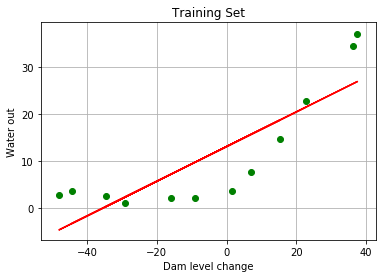

In [103]:
#problem 1.4
#plot figure
plt.plot(Xtr[:,1], thetaFinal[0] + thetaFinal[1] * Xtr[:,1], color = "red")
plotScatter(Xtr[:,1], ytr, "Training Set" ,"Dam level change", "Water out")

## Problem 2: Underfitting vs. Overfitting

In [104]:
thetaStart = np.zeros(Xtr.shape[1], dtype=np.float)
lmbda = 0
sample_size_plt =[]
J_train = []
J_validation = []
sample_size_list = np.arange(1 , Xtr.shape[0]+1)
for sample_size in sample_size_list:
    thetaFinal_train, minCost_train = optimizeTheta(Xtr[0:sample_size,:], ytr[0:sample_size,:], thetaStart, 0)
    sample_size_plt.append(sample_size)
    J_train.append(minCost_train)
    validation_Cost = computeCost(thetaFinal_train, Xval, yval, 0)
    J_validation.append(validation_Cost)

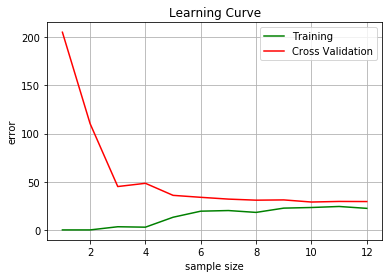

In [105]:
#problem 2.1
def plotLearningCurve(sample_size,J_train,J_validation,title,x_title,y_title):
    plt.plot(sample_size, J_train, color="green", label="Training")
    plt.plot(sample_size, J_validation, color="red", label="Cross Validation")
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid()
    plt.legend(loc="upper right")
    plt.show()
plotLearningCurve(sample_size_plt, J_train, J_validation, "Learning Curve", "sample size", "error")

## Problem 3: Polynomial Regression with Regularization
### (In this section, I am too tired to create all the hw4 by myself)
## Polynomial regression model

In order to try to solve the high bias problem we will use a more complex model with more features. Since we have no more information about the damp, we will use a polynomial model where the new features will actually be waterlevel^n.

h(x) = theta0 + theta1·waterLevel + theta2·waterLevel^2 + ... = theta0 + theta1·x1 + theta2·x2 + ...

### Create polynomial features

In [107]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = scipy.io.loadmat("hw4_data.mat")
#print(data)
Xtr = data["X"]
ytr = data["y"]
Xtest = data["Xtest"]
ytest = data["ytest"]
Xval = data["Xval"]
yval = data["yval"]
Xtr =np.insert(Xtr,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
thetaStart = np.zeros(Xtr.shape[1], dtype=np.float)

In [108]:
# function that creates the new polynomial features
def generatePolynomialFeatures(X, p):
    if p >= 1:
        count = 2
        X_poly = X
        while count <= p:
            insert_temp = np.power(X[:,1],count)
            insert_temp2 = insert_temp[:,np.newaxis]
            X_poly =np.append(X_poly,insert_temp2,axis=1)
            count = count + 1
            del insert_temp
            del insert_temp2
    else:
        X_poly = X
    return X_poly

In [109]:
# function that normalizes a data set (x-mu/sigma)
def normalizeFeatures(X):
    
    Xnorm = X.copy()
    
    # compute means and standdard deviations (column-wise)
    means = np.mean(Xnorm,axis=0)
    std_devs = np.std(Xnorm,axis=0,ddof=1)
    
    # compute normalization
    Xnorm[:,1:] = ( Xnorm[:,1:] - means[1:] ) / std_devs[1:]
        
    return Xnorm, means, std_devs

### Train Polynomial Model

In [110]:
# function that plots the polynomial regression line on top of the scatter data plot
def plotPolynomialFit(theta, original_means, original_std_devs):
    
    # create linear space to plot
    points_to_plot = 50
    x_values = np.linspace(-60, 60, points_to_plot)

    # construct 'fake' x matrix (representing all the points to plot) to compute h(x)
    x_mat = np.ones((points_to_plot,1))
    x_mat = np.insert(x_mat, x_mat.shape[1], x_values.T, axis=1)
    x_mat = generatePolynomialFeatures(x_mat, len(theta)-1)
    
    # normalize using original means and std_devs
    x_mat[:,1:] = x_mat[:,1:] - original_means[1:]
    x_mat[:,1:] = x_mat[:,1:] / original_std_devs[1:]
    
    # convert to matrices to use notation of algebra operations
    #theta = np.matrix(theta)
    x_mat = np.matrix(x_mat)
    
    # plot regression line
    plt.plot(x_values, h(x_mat, theta), 'r-')

In [111]:
# function that creates the normalized polynomial features
def createPolynomialFeaturesAndTrain(X, y, poly_degree, lmbda):
    X_poly = generatePolynomialFeatures(X, poly_degree)
    Xnorm, means, std = normalizeFeatures(X_poly)
    thetaStart = np.zeros(Xnorm.shape[1], dtype=np.float)
    thetafin, minCost = optimizeTheta(Xnorm, y, thetaStart, lmbda)
    return Xnorm, means, std, thetafin

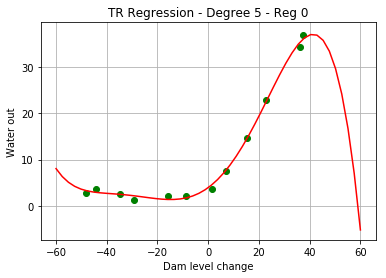

In [113]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter (note it is not used to compute Jtr and Jcv)
lmbda = 0

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# plot scatter data and regression line
plotPolynomialFit(theta_final, original_means, original_std_devs)
plotScatter(Xtr[:,1], ytr, 'TR Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'Dam level change', 'Water out')

The polynomial fit (of degree 5) clearly fits very well the training points (so we are expecting a low training cost). But also note that it quickly drops for large dam level changes, so this indicates that predicting other data with this model might not end up very well, hence a large validation(cv) error is expected.

### Learning Curves

In [114]:
# function that fits for different sample sizes and plots the learning curves
def PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xcv, ycv, poly_degree, lmbda):

    # set a theatStart initialized to zeros
    thetaStart = np.zeros(Xtr_poly.shape[1], dtype=np.float)

    # create the normalized polynomial features up to poly_degree of the validation set
    Xcv_poly = generatePolynomialFeatures(Xcv, poly_degree)
    Xcv_poly, original_means_cv, original_std_devs_cv = normalizeFeatures(Xcv_poly)

    # init arrays to store output data for later plotting
    m_values, j_tr, j_cv = [], [], []

    # loop over training subsets of different sizes (1:1,1:2,1:3,...)
    for m in range(1,Xtr_poly.shape[0]+1, 1):

        m_values.append(m)

        # train the subset and get theta that fits the given subset
        theta_subset, cost_subset = optimizeTheta(Xtr_poly[:m,:], ytr[:m], thetaStart, lmbda)

        # compute cost of the training subset (no regularization)
        j_tr.append(computeCost(theta_subset, Xtr_poly[:m,:], ytr[:m], 0))

        # compute cost of the validation(cv) subset (all samples in validation, not 1:m)(no regularization)
        j_cv.append(computeCost(theta_subset, Xcv_poly, ycv, 0))

    # check sizes
    print(len(m_values), len(j_tr), len(j_cv))

    # last cost value
    print(j_tr[-1], j_cv[-1])

    # plot the learning curves
    plotLearningCurve(m_values, j_tr, j_cv, 'Learning curves - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'sample size', 'error')


12 12 12
0.20849612413349083 14.519887513971051


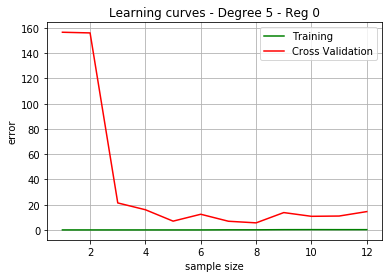

In [115]:
# Prepare for polynomial learning curves for different sample sizes and plot them
PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xval, yval, poly_degree=5, lmbda=0)

As expected, the training cost is much smaller than the validation cost (note the gap for large sample sizes). This indicates that the model has high variance (or it is overfitting).

Let's check how the model fits the Validation(CV) data.

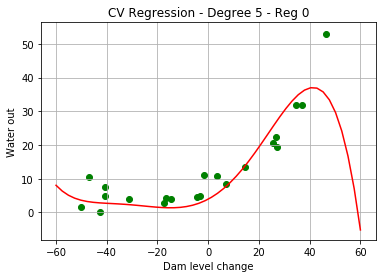

In [116]:
# plot validation scatter data and regression line
plotPolynomialFit(theta_final, original_means, original_std_devs)
plotScatter(Xval[:,1:],yval,'CV Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda),'Dam level change','Water out')

Clearly, an overfitted model... :(

### Adjusting different regularization values

12 12 12
1.9372439623512123 4.605652261437738


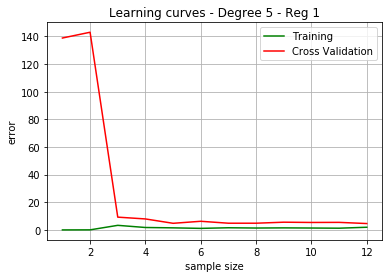

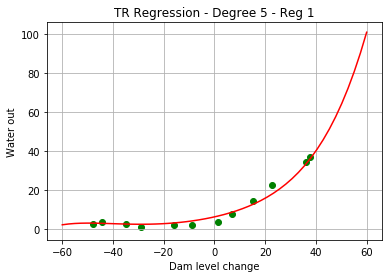

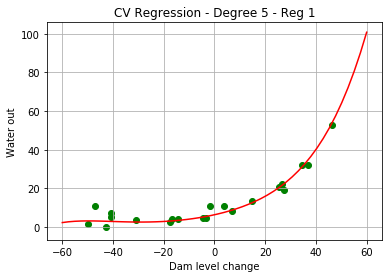

In [117]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter (note it is not used to compute Jtr and Jcv)
lmbda = 1

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# Prepare for polynomial learning curves for different sample sizes and plot them
PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xval, yval, poly_degree, lmbda)

# plot scatter data and regression line
plotPolynomialFit(theta_final, original_means, original_std_devs)
plotScatter(Xtr[:,1], ytr, 'TR Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'Dam level change', 'Water out')


# plot validation scatter data and regression line
plotPolynomialFit(theta_final, original_means, original_std_devs)
plotScatter(Xval[:,1:], yval, 'CV Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda), 'Dam level change', 'Water out')


With lmbda=1 we get a training error little bit larger (0.2=>1.93), but validation error much smaller (14=>4.6). This can be seen in the learning curves, much closer now. This means that we are reducing the high variance problem (so we are reducing the overfitting problem).

When we look at the regresison lines fitting training and validation data, it now looks much better.

So regularization (with lmbda=1) did a good job.

12 12 12
17.06120030642853 15.770405564413476


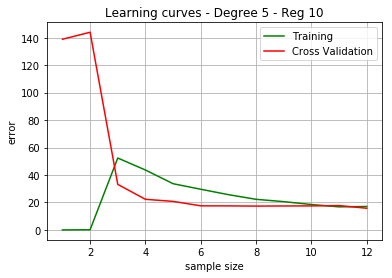

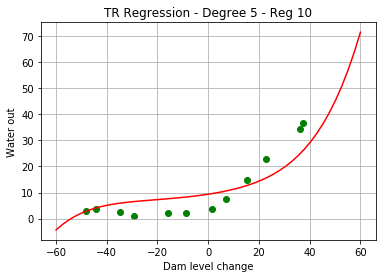

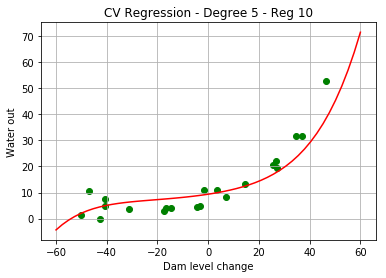

In [118]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter (note it is not used to compute Jtr and Jcv)
lmbda = 10

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# Prepare for polynomial learning curves for different sample sizes and plot them
PlotPolynomialLearningCurvesForDifferentSampleSizes(Xtr_poly, ytr, Xval, yval, poly_degree, lmbda)

# plot scatter data and regression line
plotPolynomialFit(theta_final, original_means, original_std_devs)
plotScatter(Xtr[:,1],ytr,'TR Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda),'Dam level change', 'Water out')

# plot validation scatter data and regression line
plotPolynomialFit(theta_final, original_means, original_std_devs)
plotScatter(Xval[:,1:],yval,'CV Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda),'Dam level change','Water out')

With a much larger regularization factor (lmbda=10), both the training and validation(cv) error have the same value (around 16), but large. This indicates that with a so large regularization, we ended up with a high bias model now (underfitted).

### Choosing lambda with the validation set

Let's plot some learning curves for different lmbda values

100 100 100
Minimum Jcv at lambda = 1.3636363636363635 => cost = 4.546834522339033


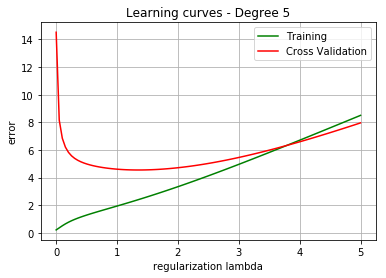

In [119]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# set all lmbda values to try
lmbdas = np.linspace(0, 5, 100)

# create the normalized polynomial features up to poly_degree of the validation set
Xval_poly = generatePolynomialFeatures(Xval,poly_degree)
Xval_poly, original_means_val, original_std_devs_val = normalizeFeatures(Xval_poly)

# init arrays to store output data for later plotting
lmbda_values, j_tr, j_val = [], [], []

for lmbda in lmbdas:
    lmbda_values.append(lmbda)
    Xnorm, means, std, thetafin = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)
    j_tr.append(computeCost(thetafin, Xnorm, ytr, 0))
    j_val.append(computeCost(thetafin, Xval_poly, yval, 0))
    

# check sizes
print(len(lmbda_values), len(j_tr), len(j_val))

# print lmbda with minimum j_cv
print('Minimum Jcv at lambda = ' + str(lmbda_values[j_val.index(min(j_val))]) + ' => cost = ' + str(min(j_val)))

# plot the learning curves
plotLearningCurve(lmbda_values, j_tr, j_val, 'Learning curves - Degree '+str(poly_degree), 'regularization lambda', 'error')

So a lambda=1.36 is the best we found to use with a polynomial regression model of degree 5!

### Test error

Let's compute the final test error with the polynomial model of degree 5 and a lambda of 1.36.

Final test cost => 8.381580339846149


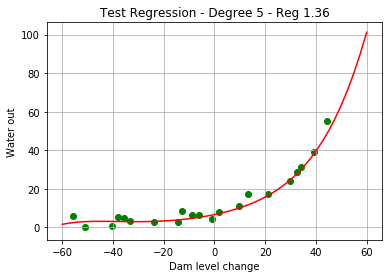

In [120]:
# degree of the polynomial model (polynomial features to construct)
poly_degree = 5

# regularization parameter
lmbda = 1.36

# create the normalized polynomial features and train the model
Xtr_poly, original_means, original_std_devs, theta_final = createPolynomialFeaturesAndTrain(Xtr, ytr, poly_degree, lmbda)

# create the normalized polynomial features up to poly_degree of the test set
Xtest_poly = generatePolynomialFeatures(Xtest,poly_degree)
Xtest_poly, original_means_test, original_std_devs_test = normalizeFeatures(Xtest_poly)

# compute test cost
j_test = computeCost(theta_final, Xtest_poly, ytest, 0)

print("Final test cost => " + str(j_test))

# plot scatter data and regression line
plotPolynomialFit(theta_final, original_means, original_std_devs)
plotScatter(Xtest[:,1], ytest, 'Test Regression - Degree '+str(poly_degree)+' - Reg '+str(lmbda),'Dam level change', 'Water out')


We finally got a test cost of 8.38 (while our best validation(cv) cost was 4.54).